<a href="https://colab.research.google.com/github/dannyyho/Flu_Shot_DataDriven_Competition/blob/main/Flu_shot.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Import Libraries and Data

In [ ]:
from pathlib import Path
from google.colab import files

import numpy as np
import pandas as pd
pd.set_option("display.max_columns", 100)
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer

from sklearn.linear_model import LogisticRegression
from sklearn.multioutput import MultiOutputClassifier

from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_curve, roc_auc_score
from sklearn.model_selection import cross_val_score

from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score, cohen_kappa_score, f1_score, log_loss
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import OrdinalEncoder

import xgboost 


In [ ]:
# import training data
features_df = pd.read_csv("training_set_features.csv", 
    index_col="respondent_id"
)
labels_df = pd.read_csv("training_set_labels.csv", 
    index_col="respondent_id"
)

# import testing data
test_df = pd.read_csv("test_set_features.csv", 
    index_col="respondent_id"
)

In [ ]:
features_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 26707 entries, 0 to 26706
Data columns (total 35 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   h1n1_concern                 26615 non-null  float64
 1   h1n1_knowledge               26591 non-null  float64
 2   behavioral_antiviral_meds    26636 non-null  float64
 3   behavioral_avoidance         26499 non-null  float64
 4   behavioral_face_mask         26688 non-null  float64
 5   behavioral_wash_hands        26665 non-null  float64
 6   behavioral_large_gatherings  26620 non-null  float64
 7   behavioral_outside_home      26625 non-null  float64
 8   behavioral_touch_face        26579 non-null  float64
 9   doctor_recc_h1n1             24547 non-null  float64
 10  doctor_recc_seasonal         24547 non-null  float64
 11  chronic_med_condition        25736 non-null  float64
 12  child_under_6_months         25887 non-null  float64
 13  health_worker   

# Data Exploration

In [ ]:
print("features_df.shape", features_df.shape)
features_df.head()

features_df.shape (26707, 35)


,h1n1_concern,h1n1_knowledge,behavioral_antiviral_meds,behavioral_avoidance,behavioral_face_mask,behavioral_wash_hands,behavioral_large_gatherings,behavioral_outside_home,behavioral_touch_face,doctor_recc_h1n1,doctor_recc_seasonal,chronic_med_condition,child_under_6_months,health_worker,health_insurance,opinion_h1n1_vacc_effective,opinion_h1n1_risk,opinion_h1n1_sick_from_vacc,opinion_seas_vacc_effective,opinion_seas_risk,opinion_seas_sick_from_vacc,age_group,education,race,sex,income_poverty,marital_status,rent_or_own,employment_status,hhs_geo_region,census_msa,household_adults,household_children,employment_industry,employment_occupation
respondent_id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,3.0,1.0,2.0,2.0,1.0,2.0,55 - 64 Years,< 12 Years,White,Female,Below Poverty,Not Married,Own,Not in Labor Force,oxchjgsf,Non-MSA,0.0,0.0,NaN,NaN
1,3.0,2.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,5.0,4.0,4.0,4.0,2.0,4.0,35 - 44 Years,12 Years,White,Male,Below Poverty,Not Married,Rent,Employed,bhuqouqj,"MSA, Not Principle City",0.0,0.0,pxcmvdjn,xgwztkwe
2,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,1.0,0.0,0.0,NaN,3.0,1.0,1.0,4.0,1.0,2.0,18 - 34 Years,College Graduate,White,Male,"<= $75,000, Above Poverty",Not Married,Own,Employed,qufhixun,"MSA, Not Principle City",2.0,0.0,rucpziij,xtkaffoo
3,1.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,NaN,3.0,3.0,5.0,5.0,4.0,1.0,65+ Years,12 Years,White,Female,Below Poverty,Not Married,Rent,Not in Labor Force,lrircsnp,"MSA, Principle City",0.0,0.0,NaN,NaN
4,2.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,NaN,3.0,3.0,2.0,3.0,1.0,4.0,45 - 54 Years,Some College,White,Female,"<= $75,000, Above Poverty",Married,Own,Employed,qufhixun,"MSA, Not Principle City",1.0,0.0,wxleyezf,emcorrxb


In [ ]:
features_df.dtypes

h1n1_concern                   float64
h1n1_knowledge                 float64
behavioral_antiviral_meds      float64
behavioral_avoidance           float64
behavioral_face_mask           float64
behavioral_wash_hands          float64
behavioral_large_gatherings    float64
behavioral_outside_home        float64
behavioral_touch_face          float64
doctor_recc_h1n1               float64
doctor_recc_seasonal           float64
chronic_med_condition          float64
child_under_6_months           float64
health_worker                  float64
health_insurance               float64
opinion_h1n1_vacc_effective    float64
opinion_h1n1_risk              float64
opinion_h1n1_sick_from_vacc    float64
opinion_seas_vacc_effective    float64
opinion_seas_risk              float64
opinion_seas_sick_from_vacc    float64
age_group                       object
education                       object
race                            object
sex                             object
income_poverty           

In [ ]:
print("labels_df.shape", labels_df.shape)
labels_df.head()

labels_df.shape (26707, 2)


,h1n1_vaccine,seasonal_vaccine
respondent_id,,
0,0,0
1,0,1
2,0,0
3,0,1
4,0,0


In [ ]:
np.testing.assert_array_equal(features_df.index.values, labels_df.index.values)

In [ ]:
#Data Exploration
%matplotlib inline
import matplotlib.pyplot as plt

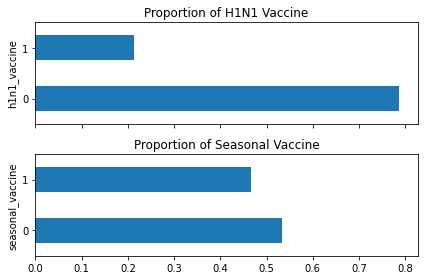

In [ ]:
fig, ax = plt.subplots(2, 1, sharex=True)

n_obs = labels_df.shape[0]

(labels_df['h1n1_vaccine']
    .value_counts()
    .div(n_obs)
    .plot.barh(title="Proportion of H1N1 Vaccine", ax=ax[0])
)
ax[0].set_ylabel("h1n1_vaccine")

(labels_df['seasonal_vaccine']
    .value_counts()
    .div(n_obs)
    .plot.barh(title="Proportion of Seasonal Vaccine", ax=ax[1])
)
ax[1].set_ylabel("seasonal_vaccine")

fig.tight_layout()
#Seasonal vaccine traget is more balanced than H1N1 vaccine

In [ ]:
pd.crosstab(
    labels_df["h1n1_vaccine"], 
    labels_df["seasonal_vaccine"], 
    margins=True,
    normalize=True
)

seasonal_vaccine,0,1,All
h1n1_vaccine,,,
0,0.497810,0.289737,0.787546
1,0.036582,0.175871,0.212454
All,0.534392,0.465608,1.000000


In [ ]:
(labels_df["h1n1_vaccine"]
     .corr(labels_df["seasonal_vaccine"], method="pearson")
)
#moderate positive correlation

0.37714265306144495

In [ ]:
#Features
#H1N1 Concern
joined_df = features_df.join(labels_df)
print(joined_df.shape)
joined_df.head()

(26707, 37)


,h1n1_concern,h1n1_knowledge,behavioral_antiviral_meds,behavioral_avoidance,behavioral_face_mask,behavioral_wash_hands,behavioral_large_gatherings,behavioral_outside_home,behavioral_touch_face,doctor_recc_h1n1,doctor_recc_seasonal,chronic_med_condition,child_under_6_months,health_worker,health_insurance,opinion_h1n1_vacc_effective,opinion_h1n1_risk,opinion_h1n1_sick_from_vacc,opinion_seas_vacc_effective,opinion_seas_risk,opinion_seas_sick_from_vacc,age_group,education,race,sex,income_poverty,marital_status,rent_or_own,employment_status,hhs_geo_region,census_msa,household_adults,household_children,employment_industry,employment_occupation,h1n1_vaccine,seasonal_vaccine
respondent_id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,3.0,1.0,2.0,2.0,1.0,2.0,55 - 64 Years,< 12 Years,White,Female,Below Poverty,Not Married,Own,Not in Labor Force,oxchjgsf,Non-MSA,0.0,0.0,NaN,NaN,0,0
1,3.0,2.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,5.0,4.0,4.0,4.0,2.0,4.0,35 - 44 Years,12 Years,White,Male,Below Poverty,Not Married,Rent,Employed,bhuqouqj,"MSA, Not Principle City",0.0,0.0,pxcmvdjn,xgwztkwe,0,1
2,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,1.0,0.0,0.0,NaN,3.0,1.0,1.0,4.0,1.0,2.0,18 - 34 Years,College Graduate,White,Male,"<= $75,000, Above Poverty",Not Married,Own,Employed,qufhixun,"MSA, Not Principle City",2.0,0.0,rucpziij,xtkaffoo,0,0
3,1.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,NaN,3.0,3.0,5.0,5.0,4.0,1.0,65+ Years,12 Years,White,Female,Below Poverty,Not Married,Rent,Not in Labor Force,lrircsnp,"MSA, Principle City",0.0,0.0,NaN,NaN,0,1
4,2.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,NaN,3.0,3.0,2.0,3.0,1.0,4.0,45 - 54 Years,Some College,White,Female,"<= $75,000, Above Poverty",Married,Own,Employed,qufhixun,"MSA, Not Principle City",1.0,0.0,wxleyezf,emcorrxb,0,0


In [ ]:
counts = (joined_df[['h1n1_concern', 'h1n1_vaccine']]
              .groupby(['h1n1_concern', 'h1n1_vaccine'])
              .size()
              .unstack('h1n1_vaccine')
         )
counts

h1n1_vaccine,0,1
h1n1_concern,,
0.0,2849,447
1.0,6756,1397
2.0,8102,2473
3.0,3250,1341


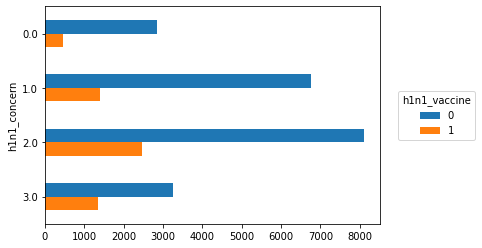

In [ ]:
ax = counts.plot.barh()
ax.invert_yaxis()
ax.legend(
    loc='center right', 
    bbox_to_anchor=(1.3, 0.5), 
    title='h1n1_vaccine'
)

In [ ]:
h1n1_concern_counts = counts.sum(axis='columns')
h1n1_concern_counts

h1n1_concern
0.0     3296
1.0     8153
2.0    10575
3.0     4591
dtype: int64

In [ ]:
props = counts.div(h1n1_concern_counts, axis='index')
props

h1n1_vaccine,0,1
h1n1_concern,,
0.0,0.864381,0.135619
1.0,0.828652,0.171348
2.0,0.766147,0.233853
3.0,0.707907,0.292093


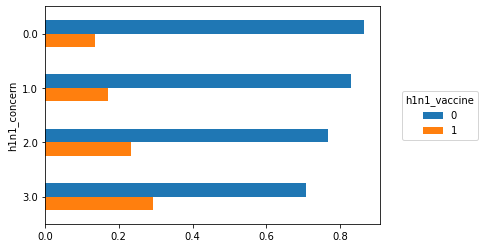

In [ ]:
ax = props.plot.barh()
ax.invert_yaxis()
ax.legend(
    loc='center left', 
    bbox_to_anchor=(1.05, 0.5),
    title='h1n1_vaccine'
)

In [ ]:
def vaccination_rate_plot(col, target, data, ax=None):
    """Stacked bar chart of vaccination rate for `target` against 
    `col`. 
    
    Args:
        col (string): column name of feature variable
        target (string): column name of target variable
        data (pandas DataFrame): dataframe that contains columns 
            `col` and `target`
        ax (matplotlib axes object, optional): matplotlib axes 
            object to attach plot to
    """
    counts = (joined_df[[target, col]]
                  .groupby([target, col])
                  .size()
                  .unstack(target)
             )
    group_counts = counts.sum(axis='columns')
    props = counts.div(group_counts, axis='index')

    props.plot(kind="barh", stacked=True, ax=ax)
    ax.invert_yaxis()
    ax.legend().remove()

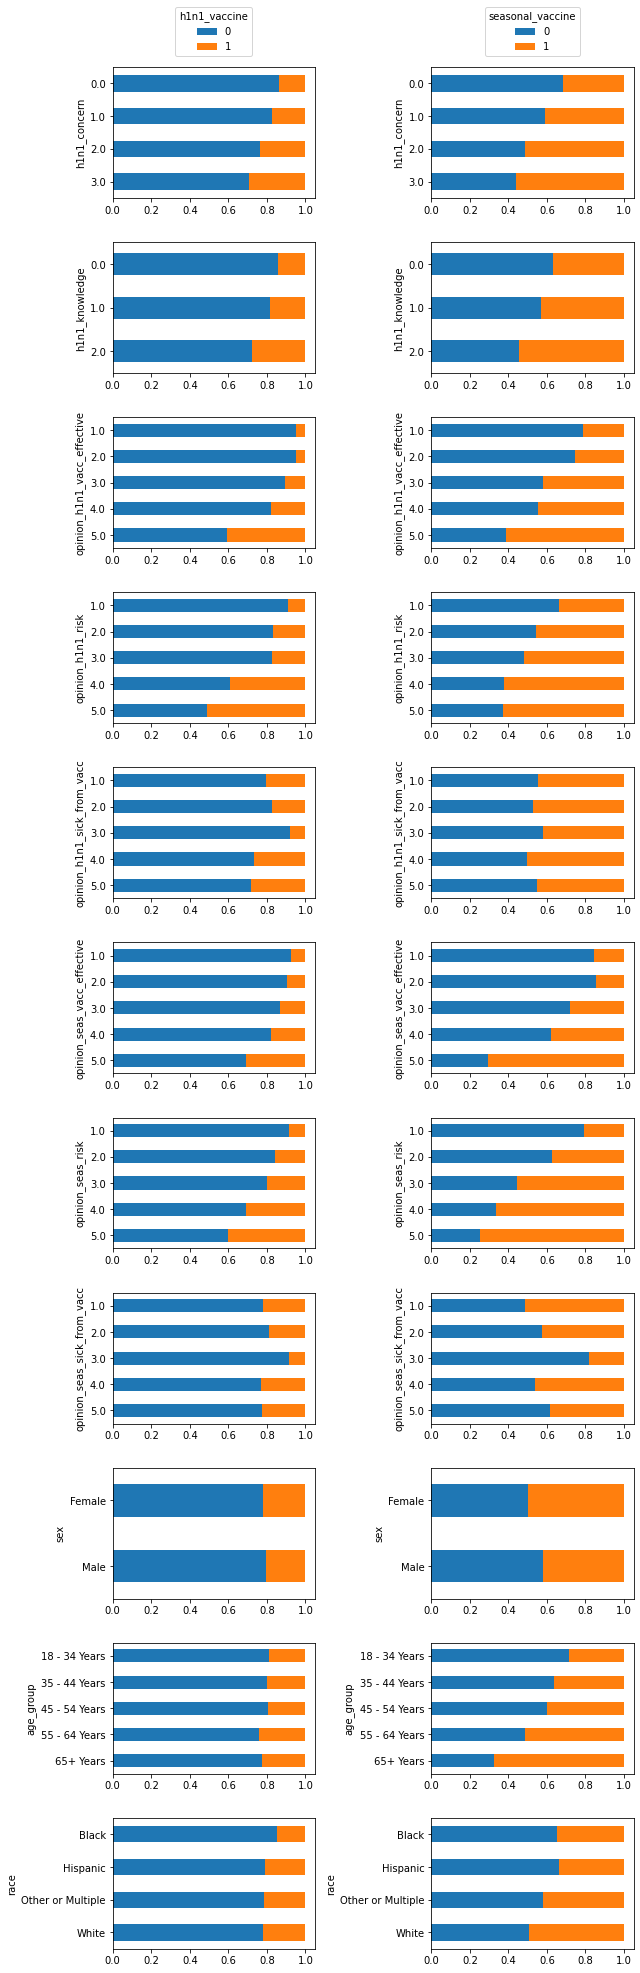

In [ ]:
cols_to_plot = [
    'h1n1_concern',
    'h1n1_knowledge',
    'opinion_h1n1_vacc_effective',
    'opinion_h1n1_risk',
    'opinion_h1n1_sick_from_vacc',
    'opinion_seas_vacc_effective',
    'opinion_seas_risk',
    'opinion_seas_sick_from_vacc',
    'sex',
    'age_group',
    'race',
]

fig, ax = plt.subplots(
    len(cols_to_plot), 2, figsize=(9,len(cols_to_plot)*2.5)
)
for idx, col in enumerate(cols_to_plot):
    vaccination_rate_plot(
        col, 'h1n1_vaccine', joined_df, ax=ax[idx, 0]
    )
    vaccination_rate_plot(
        col, 'seasonal_vaccine', joined_df, ax=ax[idx, 1]
    )
    
ax[0, 0].legend(
    loc='lower center', bbox_to_anchor=(0.5, 1.05), title='h1n1_vaccine'
)
ax[0, 1].legend(
    loc='lower center', bbox_to_anchor=(0.5, 1.05), title='seasonal_vaccine'
)
fig.tight_layout()

# Missing Value Imputation

In [ ]:
#replace blank with none  
features_df[['employment_status','employment_industry','employment_occupation','health_insurance']].fillna('none', inplace=True)
test_df[['employment_status','employment_industry','employment_occupation','health_insurance']].fillna('none', inplace=True)

/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:5182: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  downcast=downcast,


Can't figure out why but this pipeline seems to change all datatypes to objects. Should stick with a pipeline though.

In [ ]:
# replace missing value with mean for numeric columns, replace missing value with most frequent for string columns

numeric_cols = list(features_df.select_dtypes('number').columns.values)
other_cols = list(features_df.select_dtypes('object').columns.values)

imputer_numeric = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),
])

imputer_categoric = Pipeline(
    steps=[('imputer',
            SimpleImputer(strategy='most_frequent'))])

preprocessor = ColumnTransformer(transformers=[('imputer_numeric',
                                                imputer_numeric,
                                                numeric_cols),
                                               ('imputer_categoric',
                                                imputer_categoric,
                                                other_cols)])
preprocessor.fit(features_df)
train_df1=preprocessor.transform(features_df)
test_df1=preprocessor.transform(test_df)
newcolumns=np.concatenate((numeric_cols, other_cols))
# add back column names
train_df = pd.DataFrame(train_df1, columns = newcolumns)
test_df = pd.DataFrame(test_df1, columns = newcolumns)


Alternative to above (run one or the other): Same imputation just without pipeline seems to keep floats as floats and objects as objects.

In [ ]:
numeric_cols = list(features_df.select_dtypes('number').columns.values)
other_cols = list(features_df.select_dtypes('object').columns.values)

num_imputer = SimpleImputer(strategy='most_frequent').fit(features_df[numeric_cols])
train_num = pd.DataFrame(num_imputer.transform(features_df[numeric_cols]), columns = features_df[numeric_cols].columns)
test_num = pd.DataFrame(num_imputer.transform(test_df[numeric_cols]), columns = test_df[numeric_cols].columns)

cat_imputer = SimpleImputer(strategy='most_frequent').fit(features_df[other_cols])
train_cat = pd.DataFrame(cat_imputer.transform(features_df[other_cols]), columns = features_df[other_cols].columns)
test_cat = pd.DataFrame(cat_imputer.transform(test_df[other_cols]), columns = test_df[other_cols].columns)

train_df = pd.concat([train_num,train_cat],axis=1)
test_df = pd.concat([test_num,test_cat],axis=1)


In [ ]:
# Check for any nulls after imputation
print(train_df.isna().sum())
print(test_df.isna().sum())

# Check feature types after imputation
train_df.info()
#test_df.info()

In [ ]:
#check correlation 
correlation  = features_df[numeric_cols].corr()
 
sns.heatmap(correlation);

In [ ]:
train_df.to_csv('traindf.csv')

# Feature Engineering

Average of opinion columns

In [ ]:
# Create overall opinion column for both vaccines  
train_df['opinion_h1n1_mean'] = (train_df['opinion_h1n1_vacc_effective']+train_df['opinion_h1n1_risk']+train_df['opinion_h1n1_sick_from_vacc'])/3
train_df['opinion_seas_mean'] = (train_df['opinion_seas_vacc_effective']+train_df['opinion_seas_risk']+train_df['opinion_seas_sick_from_vacc'])/3

# Do the same in the testing data
test_df['opinion_h1n1_mean'] = (test_df['opinion_h1n1_vacc_effective']+test_df['opinion_h1n1_risk']+test_df['opinion_h1n1_sick_from_vacc'])/3
test_df['opinion_seas_mean'] = (test_df['opinion_seas_vacc_effective']+test_df['opinion_seas_risk']+test_df['opinion_seas_sick_from_vacc'])/3


Sum of behavioral columns

In [ ]:
# Create overall feature for behavioral columns
train_df['behavioral_sum'] = (train_df['behavioral_antiviral_meds']+train_df['behavioral_avoidance']+train_df['behavioral_face_mask']+train_df['behavioral_wash_hands']+train_df['behavioral_large_gatherings']+train_df['behavioral_outside_home']+train_df['behavioral_touch_face'])

# Testing data
test_df['behavioral_sum'] = (test_df['behavioral_antiviral_meds']+test_df['behavioral_avoidance']+test_df['behavioral_face_mask']+test_df['behavioral_wash_hands']+test_df['behavioral_large_gatherings']+test_df['behavioral_outside_home']+test_df['behavioral_touch_face'])

In [ ]:
# Create behavioural mean
train_df['behavioural_mean'] = (train_df['behavioral_sum'])/7
test_df['behavioural_mean'] = (test_df['behavioral_sum'])/7

# Create behavioural features mixed with household occupants
train_df['behavioural_household'] = train_df['behavioural_mean']*(train_df['household_adults']+train_df['household_children'])
train_df['behavioural_household_log'] = train_df['behavioural_household'].replace(to_replace = 0, value = 1)
train_df['behavioural_household_log'] = np.log(train_df['behavioural_household_log'])

test_df['behavioural_household'] = test_df['behavioural_mean']*(test_df['household_adults']+test_df['household_children'])
test_df['behavioural_household_log'] = test_df['behavioural_household'].replace(to_replace = 0, value = 1)
test_df['behavioural_household_log'] = np.log(test_df['behavioural_household_log'])


Average values for various columns based on demographics

In [ ]:
# Average based on age group (from training data)
age_means = train_df.groupby("age_group")[['doctor_recc_h1n1','doctor_recc_seasonal','h1n1_concern','chronic_med_condition','opinion_h1n1_vacc_effective', 'opinion_h1n1_risk', 'opinion_h1n1_sick_from_vacc']].mean().add_suffix('_ageMean').reset_index('age_group')
# Join to both training and testing
train_df = train_df.merge(age_means, on='age_group', how='left')
test_df = test_df.merge(age_means, on='age_group', how='left')

# Average based on race group (from training data)
race_means = train_df.groupby("race")[['doctor_recc_h1n1','doctor_recc_seasonal','h1n1_concern','chronic_med_condition','opinion_h1n1_vacc_effective', 'opinion_h1n1_risk', 'opinion_h1n1_sick_from_vacc']].mean().add_suffix('_raceMean').reset_index('race')
train_df = train_df.merge(race_means, on='race', how='left')
test_df = test_df.merge(race_means, on='race', how='left')

# Average based on geographic area (from training data)
geo_means = train_df.groupby("hhs_geo_region")[['doctor_recc_h1n1','doctor_recc_seasonal','h1n1_concern','chronic_med_condition','opinion_h1n1_vacc_effective', 'opinion_h1n1_risk', 'opinion_h1n1_sick_from_vacc']].mean().add_suffix('_geoMean').reset_index('hhs_geo_region')
train_df = train_df.merge(geo_means, on='hhs_geo_region', how='left')
test_df = test_df.merge(geo_means, on='hhs_geo_region', how='left')

#Average based on sex (from training data)
sex_means = train_df.groupby("sex")[['doctor_recc_h1n1','doctor_recc_seasonal','h1n1_concern','chronic_med_condition','opinion_h1n1_vacc_effective', 'opinion_h1n1_risk', 'opinion_h1n1_sick_from_vacc']].mean().add_suffix('_sexMean').reset_index('sex')
train_df = train_df.merge(sex_means, on='sex', how='left')
test_df = test_df.merge(sex_means, on='sex', how='left')

#Average based on employment (from training data)
emp_means = train_df.groupby("employment_status")[['doctor_recc_h1n1','doctor_recc_seasonal','h1n1_concern','chronic_med_condition','opinion_h1n1_vacc_effective', 'opinion_h1n1_risk', 'opinion_h1n1_sick_from_vacc']].mean().add_suffix('_empMean').reset_index('employment_status')
train_df = train_df.merge(emp_means, on='employment_status', how='left')
test_df = test_df.merge(emp_means, on='employment_status', how='left')

#Average based on income (from training data)
pov_means = train_df.groupby("income_poverty")[['doctor_recc_h1n1','doctor_recc_seasonal','h1n1_concern','h1n1_knowledge','health_insurance','chronic_med_condition','opinion_h1n1_vacc_effective', 'opinion_h1n1_risk', 'opinion_h1n1_sick_from_vacc']].mean().add_suffix('_povMean').reset_index('income_poverty')
train_df = train_df.merge(pov_means, on='income_poverty', how='left')
test_df = test_df.merge(pov_means, on='income_poverty', how='left')

#Average based on rent or own (from training data)
ro_means = train_df.groupby("rent_or_own")[['doctor_recc_h1n1','doctor_recc_seasonal','h1n1_concern','h1n1_knowledge','health_insurance','chronic_med_condition','opinion_h1n1_vacc_effective', 'opinion_h1n1_risk', 'opinion_h1n1_sick_from_vacc']].mean().add_suffix('_roMean').reset_index('rent_or_own')
train_df = train_df.merge(ro_means, on='rent_or_own', how='left')
test_df = test_df.merge(ro_means, on='rent_or_own', how='left')



Behavioral feature based on education

In [ ]:
# Mean based on education group (from training data)
behavioral_education = train_df.groupby("education")[['behavioral_antiviral_meds', 'behavioral_avoidance', 'behavioral_face_mask', 'behavioral_wash_hands', 'behavioral_large_gatherings', 'behavioral_outside_home', 'behavioral_touch_face']].mean().add_suffix('_education').reset_index('education')

train_df = train_df.merge(behavioral_education, on='education', how='left')
test_df = test_df.merge(behavioral_education, on='education', how='left')

In [ ]:
# h1n1 concern and knowledge based on income feature
train_df['concern_knowledge'] = (train_df['h1n1_concern']+train_df['h1n1_knowledge']/2)

income_h1n1_avg = train_df.groupby("income_poverty")[['concern_knowledge']].mean().add_suffix('_income').reset_index('income_poverty')

train_df = train_df.merge(income_h1n1_avg, on='income_poverty', how='left')
test_df = test_df.merge(income_h1n1_avg, on='income_poverty', how='left')


In [ ]:
# Show the data to see our new columns
train_df

Ordinal column conversion

In [ ]:
!pip install category_encoders
import category_encoders as ce
from category_encoders.wrapper import PolynomialWrapper

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 69 kB 2.3 MB/s 


/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [ ]:
# h1n1 concern and knowledge based on income feature
train_df['concern_knowledge'] = (train_df['h1n1_concern']+train_df['h1n1_knowledge']/2)

income_h1n1_avg = train_df.groupby("income_poverty")[['concern_knowledge']].mean().add_suffix('_income').reset_index('income_poverty')

train_df = train_df.merge(income_h1n1_avg, on='income_poverty', how='left')
test_df = test_df.merge(income_h1n1_avg, on='income_poverty', how='left')


In [ ]:
#ordinal encoding - education

edux = OrdinalEncoder(categories=[['< 12 Years','12 Years', 'Some College', 'College Graduate']])
edux = edux.fit(train_df[['education']])

train_df['Education_Ord'] = edux.transform(train_df[['education']])
test_df['Education_Ord'] = edux.transform(test_df[['education']])

# age

agex = OrdinalEncoder(categories=[['18 - 34 Years','35 - 44 Years', '45 - 54 Years', '55 - 64 Years', '65+ Years']])
agex = agex.fit(train_df[['age_group']])

train_df['Age_Ord'] = agex.transform(train_df[['age_group']])
test_df['Age_Ord'] = agex.transform(test_df[['age_group']])

#income

incomex = OrdinalEncoder(categories=[['Below Poverty','<= $75,000, Above Poverty', '> $75,000']])
incomex = incomex.fit(train_df[['income_poverty']])

train_df['Income_Ord'] = incomex.transform(train_df[['income_poverty']])
test_df['Income_Ord'] = incomex.transform(test_df[['income_poverty']])

In [ ]:
#target encoding of 6 opinions
opin1=train_df['opinion_h1n1_vacc_effective'].mean()
opin2=train_df['opinion_h1n1_risk'].mean()
opin3=train_df['opinion_h1n1_sick_from_vacc'].mean()
opin4=train_df['opinion_seas_vacc_effective'].mean()
opin5=train_df['opinion_seas_risk'].mean()
opin6=train_df['opinion_seas_sick_from_vacc'].mean()

train_df['opinion_h1n1_vacc_effective_overavg']=np.where(train_df['opinion_h1n1_vacc_effective']>opin1,1,0)
train_df['opinion_h1n1_risk_overavg']=np.where(train_df['opinion_h1n1_vacc_effective']>opin1,1,0)
train_df['opinion_h1n1_sick_from_vacc_lessavg']=np.where(train_df['opinion_h1n1_sick_from_vacc']<opin1,1,0)
train_df['opinion_seas_vacc_effective_overavg']=np.where(train_df['opinion_seas_vacc_effective']>opin1,1,0)
train_df['opinion_seas_risk_overavg']=np.where(train_df['opinion_seas_risk']>opin1,1,0)
train_df['opinion_seas_sick_from_vacc_lessavg']=np.where(train_df['opinion_seas_sick_from_vacc']<opin1,1,0)


test_df['opinion_h1n1_vacc_effective_overavg']=np.where(test_df['opinion_h1n1_vacc_effective']>opin1,1,0)
test_df['opinion_h1n1_risk_overavg']=np.where(test_df['opinion_h1n1_vacc_effective']>opin1,1,0)
test_df['opinion_h1n1_sick_from_vacc_lessavg']=np.where(test_df['opinion_h1n1_sick_from_vacc']<opin1,1,0)
test_df['opinion_seas_vacc_effective_overavg']=np.where(test_df['opinion_seas_vacc_effective']>opin1,1,0)
test_df['opinion_seas_risk_overavg']=np.where(test_df['opinion_seas_risk']>opin1,1,0)
test_df['opinion_seas_sick_from_vacc_lessavg']=np.where(test_df['opinion_seas_sick_from_vacc']<opin1,1,0)

In [ ]:
#drop columns 
train_df.drop(['health_insurance'], axis=1)
test_df.drop(['health_insurance'], axis=1)

In [ ]:
train_df 

,h1n1_concern,h1n1_knowledge,behavioral_antiviral_meds,behavioral_avoidance,behavioral_face_mask,behavioral_wash_hands,behavioral_large_gatherings,behavioral_outside_home,behavioral_touch_face,doctor_recc_h1n1,doctor_recc_seasonal,chronic_med_condition,child_under_6_months,health_worker,health_insurance,opinion_h1n1_vacc_effective,opinion_h1n1_risk,opinion_h1n1_sick_from_vacc,opinion_seas_vacc_effective,opinion_seas_risk,opinion_seas_sick_from_vacc,household_adults,household_children,age_group,education,race,sex,income_poverty,marital_status,rent_or_own,employment_status,hhs_geo_region,census_msa,employment_industry,employment_occupation,opinion_h1n1_mean,opinion_seas_mean,behavioral_sum,behavioural_mean,behavioural_household,behavioural_household_log,doctor_recc_h1n1_ageMean,doctor_recc_seasonal_ageMean,h1n1_concern_ageMean,chronic_med_condition_ageMean,opinion_h1n1_vacc_effective_ageMean,opinion_h1n1_risk_ageMean,opinion_h1n1_sick_from_vacc_ageMean,doctor_recc_h1n1_raceMean,doctor_recc_seasonal_raceMean,...,doctor_recc_seasonal_sexMean,h1n1_concern_sexMean,chronic_med_condition_sexMean,opinion_h1n1_vacc_effective_sexMean,opinion_h1n1_risk_sexMean,opinion_h1n1_sick_from_vacc_sexMean,doctor_recc_h1n1_empMean,doctor_recc_seasonal_empMean,h1n1_concern_empMean,chronic_med_condition_empMean,opinion_h1n1_vacc_effective_empMean,opinion_h1n1_risk_empMean,opinion_h1n1_sick_from_vacc_empMean,doctor_recc_h1n1_povMean,doctor_recc_seasonal_povMean,h1n1_concern_povMean,h1n1_knowledge_povMean,health_insurance_povMean,chronic_med_condition_povMean,opinion_h1n1_vacc_effective_povMean,opinion_h1n1_risk_povMean,opinion_h1n1_sick_from_vacc_povMean,doctor_recc_h1n1_roMean,doctor_recc_seasonal_roMean,h1n1_concern_roMean,h1n1_knowledge_roMean,health_insurance_roMean,chronic_med_condition_roMean,opinion_h1n1_vacc_effective_roMean,opinion_h1n1_risk_roMean,opinion_h1n1_sick_from_vacc_roMean,behavioral_antiviral_meds_education,behavioral_avoidance_education,behavioral_face_mask_education,behavioral_wash_hands_education,behavioral_large_gatherings_education,behavioral_outside_home_education,behavioral_touch_face_education,concern_knowledge,concern_knowledge_income_x,concern_knowledge_income_y,Education_Ord,Age_Ord,Income_Ord,opinion_h1n1_vacc_effective_overavg,opinion_h1n1_risk_overavg,opinion_h1n1_sick_from_vacc_lessavg,opinion_seas_vacc_effective_overavg,opinion_seas_risk_overavg,opinion_seas_sick_from_vacc_lessavg
0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,3.0,1.0,2.0,2.0,1.0,2.0,0.0,0.0,55 - 64 Years,< 12 Years,White,Female,Below Poverty,Not Married,Own,Not in Labor Force,oxchjgsf,Non-MSA,fcxhlnwr,xtkaffoo,2.000000,1.666667,2.0,0.285714,0.000000,0.000000,0.215711,0.334532,1.665289,0.314938,3.889448,2.321769,2.325184,0.199133,0.30671,...,0.329424,1.715664,0.291273,3.866692,2.435553,2.453525,0.221288,0.372984,1.666504,0.384518,3.871176,2.331541,2.389991,0.217649,0.293289,1.813867,0.967000,0.807935,0.355951,3.818687,2.611791,2.740823,0.202089,0.309943,1.619453,1.297093,0.955674,0.266339,3.860092,2.311435,2.309366,0.086331,0.713077,0.120609,0.842996,0.512061,0.511638,0.722387,1.0,2.297367,2.297367,0.0,3.0,0.0,0,0,1,0,0,1
1,3.0,2.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,5.0,4.0,4.0,4.0,2.0,4.0,0.0,0.0,35 - 44 Years,12 Years,White,Male,Below Poverty,Not Married,Rent,Employed,bhuqouqj,"MSA, Not Principle City",pxcmvdjn,xgwztkwe,4.333333,3.333333,4.0,0.571429,0.000000,0.000000,0.204002,0.250520,1.668139,0.183212,3.820946,2.474792,2.442308,0.199133,0.30671,...,0.264541,1.479676,0.246198,3.832519,2.194396,2.204535,0.191972,0.260933,1.576915,0.196698,3.846236,2.346868,2.310457,0.217649,0.293289,1.813867,0.967000,0.807935,0.355951,3.818687,2.611791,2.740823,0.203913,0.278968,1.621015,1.136279,0.862540,0.296171,3.827290,2.429246,2.503120,0.054338,0.721408,0.066586,0.837502,0.436950,0.426600,0.709160,4.0,2.297367,2.297367,1.0,1.0,0.0,1,1,0,1,0,0
2,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,3.0,1.0,1.0,4.0,1.0,2.0,2

Dummy variable conversion of any categorical features still leftover after ordinal conversion

In [ ]:
# SHOULD CHANGE TO SKLEARN ONEHOTENCODER IN A PIPELINE BUT THIS WORKS FOR NOW

train_df['train_test'] = 1
test_df['train_test'] = 2

# Loop through object columns and transform to dummy variable
all_data = pd.concat([train_df,test_df],axis=0)
collector = pd.DataFrame()
for col in all_data.select_dtypes('object'):
    print(col)
    col_dummies = pd.get_dummies(all_data[col], drop_first=True, prefix=col, prefix_sep='_')
    collector = pd.concat([collector, col_dummies], axis=1)

# Combine encoded object data with numeric data
all_data = pd.concat([all_data.select_dtypes(['number']),collector],axis=1)

# Some characters in the column names raised an error in xgboost so remove them
all_data.columns = all_data.columns.str.replace('<', '')
all_data.columns = all_data.columns.str.replace('>', '')

train_df = all_data[all_data['train_test'] == 1]
train_df = train_df.drop(['train_test'],axis=1)
test_df = all_data[all_data['train_test'] == 2]
test_df = test_df.drop(['train_test'],axis=1)


age_group
education
race
sex
income_poverty
marital_status
rent_or_own
employment_status
hhs_geo_region
census_msa
employment_industry
employment_occupation


Export dataset now that it is imputed and engineered

In [ ]:
#train_df.to_csv('feature.csv')

# Modeling

Isolate X features and y feature variables for both h1n1 and seasonal flu

In [ ]:
X_train = train_df
y_train_h1n1 = labels_df['h1n1_vaccine']
y_train_seas = labels_df['seasonal_vaccine']

X_test = test_df

In [ ]:
X_test

,h1n1_concern,h1n1_knowledge,behavioral_antiviral_meds,behavioral_avoidance,behavioral_face_mask,behavioral_wash_hands,behavioral_large_gatherings,behavioral_outside_home,behavioral_touch_face,doctor_recc_h1n1,doctor_recc_seasonal,chronic_med_condition,child_under_6_months,health_worker,health_insurance,opinion_h1n1_vacc_effective,opinion_h1n1_risk,opinion_h1n1_sick_from_vacc,opinion_seas_vacc_effective,opinion_seas_risk,opinion_seas_sick_from_vacc,household_adults,household_children,opinion_h1n1_mean,opinion_seas_mean,behavioral_sum,behavioural_mean,behavioural_household,behavioural_household_log,doctor_recc_h1n1_ageMean,doctor_recc_seasonal_ageMean,h1n1_concern_ageMean,chronic_med_condition_ageMean,opinion_h1n1_vacc_effective_ageMean,opinion_h1n1_risk_ageMean,opinion_h1n1_sick_from_vacc_ageMean,doctor_recc_h1n1_raceMean,doctor_recc_seasonal_raceMean,h1n1_concern_raceMean,chronic_med_condition_raceMean,opinion_h1n1_vacc_effective_raceMean,opinion_h1n1_risk_raceMean,opinion_h1n1_sick_from_vacc_raceMean,doctor_recc_h1n1_geoMean,doctor_recc_seasonal_geoMean,h1n1_concern_geoMean,chronic_med_condition_geoMean,opinion_h1n1_vacc_effective_geoMean,opinion_h1n1_risk_geoMean,opinion_h1n1_sick_from_vacc_geoMean,...,hhs_geo_region_kbazzjca,hhs_geo_region_lrircsnp,hhs_geo_region_lzgpxyit,hhs_geo_region_mlyzmhmf,hhs_geo_region_oxchjgsf,hhs_geo_region_qufhixun,"census_msa_MSA, Principle City",census_msa_Non-MSA,employment_industry_atmlpfrs,employment_industry_cfqqtusy,employment_industry_dotnnunm,employment_industry_fcxhlnwr,employment_industry_haxffmxo,employment_industry_ldnlellj,employment_industry_mcubkhph,employment_industry_mfikgejo,employment_industry_msuufmds,employment_industry_nduyfdeo,employment_industry_phxvnwax,employment_industry_pxcmvdjn,employment_industry_qnlwzans,employment_industry_rucpziij,employment_industry_saaquncn,employment_industry_vjjrobsf,employment_industry_wlfvacwt,employment_industry_wxleyezf,employment_industry_xicduogh,employment_industry_xqicxuve,employment_occupation_ccgxvspp,employment_occupation_cmhcxjea,employment_occupation_dcjcmpih,employment_occupation_dlvbwzss,employment_occupation_emcorrxb,employment_occupation_haliazsg,employment_occupation_hfxkjkmi,employment_occupation_hodpvpew,employment_occupation_kldqjyjy,employment_occupation_mxkfnird,employment_occupation_oijqvulv,employment_occupation_pvmttkik,employment_occupation_qxajmpny,employment_occupation_rcertsgn,employment_occupation_tfqavkke,employment_occupation_ukymxvdu,employment_occupation_uqqtjvyb,employment_occupation_vlluhbov,employment_occupation_xgwztkwe,employment_occupation_xqwwgdyp,employment_occupation_xtkaffoo,employment_occupation_xzmlyyjv
0,2.0,2.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,5.0,1.0,1.0,5.0,1.0,1.0,1.0,0.0,2.333333,2.333333,4.0,0.571429,0.571429,-0.559616,0.204002,0.250520,1.668139,0.183212,3.820946,2.474792,2.442308,0.226211,0.256980,1.837037,0.203989,3.811396,2.756695,2.818803,0.206420,0.287115,1.608560,0.285778,3.840838,2.307178,2.402586,...,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.0,1.0,1.0,4.0,1.0,1.0,3.0,0.0,2.000000,2.000000,0.0,0.000000,0.000000,0.000000,0.200767,0.218217,1.455417,0.152637,3.823778,2.407670,2.397124,0.199133,0.306710,1.562718,0.276930,3.874093,2.298935,2.272218,0.265636,0.349613,1.658117,0.280042,3.963809,2.418833,2.317287,...,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
2,2.0,2.0,0.0,0.0,1.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,5.0,4.0,2.0,5.0,4.0,4.0,1.0,0.0,3.666667,4.333333,5.0,0.714286,0.714286,-0.336472,0.215711,0.334532,1.665289,0.314938,3.889448,2.321769,2.325184,0.199133,0.306710,1.562718,0.276930,3.874093,2.298935,2.272218,0.189605,0.255534,1.489894,0.245910,3.778633,2.293070,2.269490,...,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
3,1.0,1

Create baseline xgboost classifier for h1n1 and seasonal flu

In [ ]:
h1n1_xgclassifier = xgboost.XGBClassifier(use_label_encoder=False,eval_metric="auc",seed=0)
seas_xgclassifier = xgboost.XGBClassifier(use_label_encoder=False,eval_metric="auc",seed=0)

# Cross validate using auc as our metric and print out average of all folds
h1n1_cv_scores = cross_val_score(h1n1_xgclassifier, X_train, y_train_h1n1, cv=5, scoring='roc_auc')
print("\nH1N1 Model, K={:3d} CV, ROC AUC: {:0.3f} +/- {:0.2f}".format(15, np.mean(h1n1_cv_scores), np.std(h1n1_cv_scores)))

# Now fit xgboost H1N1 classifier and predict probabiliities
h1n1_xgclassifier.fit(X_train, y_train_h1n1)
y_pred_h1n1 = h1n1_xgclassifier.predict_proba(X_test)

# Cross validate using auc as our metric and print out average of all folds
seas_cv_scores = cross_val_score(seas_xgclassifier, X_train, y_train_seas, cv=5, scoring='roc_auc')
print("Seasonal Model, K={:3d} CV, ROC AUC: {:0.3f} +/- {:0.2f}".format(15, np.mean(seas_cv_scores), np.std(seas_cv_scores)))

# Now fit xgboost SEASONAL FLU classifier and predict probabiliities
seas_xgclassifier.fit(X_train, y_train_seas)
y_pred_seas = seas_xgclassifier.predict_proba(X_test)


H1N1 Model, K= 15 CV, ROC AUC: 0.838 +/- 0.01
Seasonal Model, K= 15 CV, ROC AUC: 0.859 +/- 0.00


In [ ]:
pd.DataFrame({'Features':list(X_train.columns),'Importance':list(h1n1_xgclassifier.feature_importances_)})

,Features,Importance
0,h1n1_concern,0.009902
1,h1n1_knowledge,0.017105
2,behavioral_antiviral_meds,0.007614
3,behavioral_avoidance,0.000000
4,behavioral_face_mask,0.007558
...,...,...
166,employment_occupation_vlluhbov,0.000000
167,employment_occupation_xgwztkwe,0.006124
168,employment_occupation_xqwwgdyp,0.000000
169,employment_occupation_xtkaffoo,0.000000


In [ ]:
pd.DataFrame({'Features':list(X_train.columns),'Importance':list(seas_xgclassifier.feature_importances_)})

,Features,Importance
0,h1n1_concern,0.004764
1,h1n1_knowledge,0.020582
2,behavioral_antiviral_meds,0.003227
3,behavioral_avoidance,0.002913
4,behavioral_face_mask,0.003646
...,...,...
156,employment_occupation_vlluhbov,0.000000
157,employment_occupation_xgwztkwe,0.004130
158,employment_occupation_xqwwgdyp,0.000000
159,employment_occupation_xtkaffoo,0.006185


Random Forest

In [ ]:
from sklearn.ensemble import BaggingClassifier
from sklearn.tree import DecisionTreeClassifier

bag_clf = BaggingClassifier(
    DecisionTreeClassifier(random_state=42), n_estimators=500,
    max_samples=100, bootstrap=True, n_jobs=-1, random_state=42)
bag_clf.fit(X_train, y_train_h1n1)
y_pred = bag_clf.predict(X_test)

ValueError: ignored

Create a submission file!

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

In [ ]:
submission = pd.DataFrame({'respondent_id':X_test.reset_index()['index'],
                           'h1n1_vaccine':list(y_pred_h1n1[:,1]),
                           'seasonal_vaccine':list(y_pred_seas[:,1])})

submission.to_csv('submission.csv',index = False)

Create Sklearn Decision Tree

In [ ]:
clf = DecisionTreeClassifier(random_state=0, criterion="entropy", max_depth=5)

# Cross validate using auc as our metric and print out average of all folds
h1n1_cv_scores = cross_val_score(h1n1_xgclassifier, X_train, y_train_h1n1, cv=15, scoring='roc_auc')
print("\nH1N1 Model, K={:3d} CV, ROC AUC: {:0.3f} +/- {:0.2f}".format(15, np.mean(h1n1_cv_scores), np.std(h1n1_cv_scores)))

# Fit model now that we have an idea of how well it will perform
clf.fit(X_train, y_train_h1n1)

# Generate predictions
y_pred_h1n1 = clf.predict_proba(X_test)

# Isolate probabilities of a 1 to submit
y_pred_h1n1 = y_pred_h1n1[:,1]

In [ ]:
class_names = [str(x) for x in clf.classes_]

In [ ]:
new_data = [[1, 1, 3, 3, 5]]
clf.predict_proba(new_data)
clf.predict(new_data)

array([0])

In [ ]:
print(clf.tree_.node_count)
print(clf.tree_.impurity)
print(clf.tree_.children_left)
print(clf.tree_.threshold)

In [ ]:
from sklearn.metrics import confusion_matrix

confusion_matrix(y_test, y_pred_dt)

array([[3990,  222],
       [ 795,  335]])

In [ ]:
from sklearn.metrics import classification_report

print(classification_report(y_test, y_pred_dt, target_names=class_names))

              precision    recall  f1-score   support

           0       0.83      0.95      0.89      4212
           1       0.60      0.30      0.40      1130

    accuracy                           0.81      5342
   macro avg       0.72      0.62      0.64      5342
weighted avg       0.78      0.81      0.78      5342



In [ ]:
from sklearn.metrics import accuracy_score, cohen_kappa_score, f1_score, log_loss

print("Accuracy = {:.2f}".format(accuracy_score(y_test, y_pred_dt)))
print("Kappa = {:.2f}".format(cohen_kappa_score(y_test, y_pred_dt)))
print("F1 Score = {:.2f}".format(f1_score(y_test, y_pred_dt)))
print("Log Loss = {:.2f}".format(log_loss(y_test, y_pred_dt)))

Accuracy = 0.81
Kappa = 0.30
F1 Score = 0.40
Log Loss = 6.58


Decision Tree: Model Visualization

In [ ]:
from sklearn import tree
tree.plot_tree(clf)

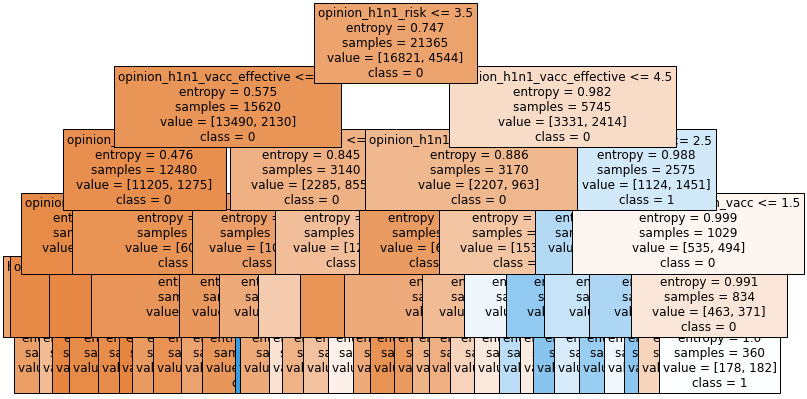

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 7));
tree.plot_tree(clf, filled=True, feature_names=feature_names, class_names=class_names, proportion=False, fontsize=12);

Naive Bayes

In [ ]:
from sklearn.naive_bayes import GaussianNB
gnb = GaussianNB()
gnb = gnb.fit(X_train, y_train)

y_pred_gnb = gnb.predict(X_test)

In [ ]:
gnb.theta_ # Mean of each feature per class
gnb.sigma_ # Variance of each feature per class


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:103: FutureWarning: Attribute `sigma_` was deprecated in 1.0 and will be removed in1.2. Use `var_` instead.
  warnings.warn(msg, category=FutureWarning)


array([[0.39914506, 0.84813691, 1.35179986, 1.51730457, 1.91662413],
       [0.38548313, 0.78674474, 0.99094224, 2.04255258, 2.2512611 ]])

In [ ]:
confusion_matrix(y_test, y_pred_gnb)

array([[3811,  401],
       [ 703,  427]])

In [ ]:
print(classification_report(y_test, y_pred_gnb, target_names=class_names))

              precision    recall  f1-score   support

           0       0.84      0.90      0.87      4212
           1       0.52      0.38      0.44      1130

    accuracy                           0.79      5342
   macro avg       0.68      0.64      0.65      5342
weighted avg       0.77      0.79      0.78      5342



In [ ]:
print("Accuracy = {:.2f}".format(accuracy_score(y_test, y_pred_gnb)))
print("Kappa = {:.2f}".format(cohen_kappa_score(y_test, y_pred_gnb)))
print("F1 Score = {:.2f}".format(f1_score(y_test, y_pred_gnb)))
print("Log Loss = {:.2f}".format(log_loss(y_test, y_pred_gnb)))

Accuracy = 0.79
Kappa = 0.31
F1 Score = 0.44
Log Loss = 7.14


KNN

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

knn_clf = KNeighborsClassifier(n_neighbors=50)
knn_clf.fit(X_train, y_train)

y_pred_knn = knn_clf.predict(X_test)

In [ ]:
knn_clf.effective_metric_
knn_clf.effective_metric_params_

{}

In [ ]:
print(confusion_matrix(y_test, y_pred_knn))

[[3999  213]
 [ 798  332]]


In [ ]:
print(classification_report(y_test, y_pred_knn, target_names=class_names))

              precision    recall  f1-score   support

           0       0.83      0.95      0.89      4212
           1       0.61      0.29      0.40      1130

    accuracy                           0.81      5342
   macro avg       0.72      0.62      0.64      5342
weighted avg       0.79      0.81      0.78      5342



In [ ]:
print("Accuracy = {:.2f}".format(accuracy_score(y_test, y_pred_knn)))
print("Kappa = {:.2f}".format(cohen_kappa_score(y_test, y_pred_knn)))
print("F1 Score = {:.2f}".format(f1_score(y_test, y_pred_knn)))
print("Log Loss = {:.2f}".format(log_loss(y_test, y_pred_knn)))

Accuracy = 0.81
Kappa = 0.30
F1 Score = 0.40
Log Loss = 6.54


SVM - Linear

In [ ]:
from sklearn.svm import SVC

svm_clf = SVC(kernel="linear", C=0.025)
svm_clf.fit(X_train, y_train)

y_pred_svm = svm_clf.predict(X_test)

In [ ]:
svm_clf.n_support_

array([4550, 4544], dtype=int32)

In [ ]:
svm_clf.dual_coef_ 

array([[-0.025, -0.025, -0.025, ...,  0.025,  0.025,  0.025]])

In [ ]:
svm_clf.intercept_ 


array([-0.99988016])

In [ ]:
print(confusion_matrix(y_test, y_pred_svm))


[[4212    0]
 [1130    0]]


In [ ]:
print(classification_report(y_test, y_pred_svm, target_names=class_names))


              precision    recall  f1-score   support

           0       0.79      1.00      0.88      4212
           1       0.00      0.00      0.00      1130

    accuracy                           0.79      5342
   macro avg       0.39      0.50      0.44      5342
weighted avg       0.62      0.79      0.70      5342



/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:
print("Accuracy = {:.2f}".format(accuracy_score(y_test, y_pred_svm)))
print("Kappa = {:.2f}".format(cohen_kappa_score(y_test, y_pred_svm)))
print("F1 Score = {:.2f}".format(f1_score(y_test, y_pred_svm)))
print("Log Loss = {:.2f}".format(log_loss(y_test, y_pred_svm)))

Accuracy = 0.79
Kappa = 0.00
F1 Score = 0.00
Log Loss = 7.31


Neural Network

In [ ]:
from sklearn.neural_network import MLPClassifier

nn_clf = MLPClassifier(solver='lbfgs', activation='relu', alpha=1e-3, max_iter=1500,
                       hidden_layer_sizes=(10, 10), random_state=1, verbose=True)
nn_clf.fit(X_train, y_train)

y_pred_nn = nn_clf.predict(X_test)

In [ ]:
nn_clf.loss_
nn_clf.n_layers_
w = nn_clf.coefs_ # The ith element in the list represents the weight matrix corresponding to layer i.
w

[array([[ 0.31272268,  0.19307886, -0.40485954,  0.11441971, -0.49205486,
         -0.79442103, -1.04936359,  0.21143514, -0.07839667,  0.15571606],
        [-0.56269089, -0.09594636, -0.60141956,  0.24631441, -0.83118256,
          0.40691871,  0.3923574 , -0.25979859, -0.17399615, -1.03040159],
        [ 0.05179171,  0.79807819, -0.61123354,  0.81435897, -0.28658127,
          0.12477172, -0.00163046, -0.94267643, -0.67362675,  0.10011826],
        [-0.149674  ,  0.37202512,  0.91650926,  0.48977304, -0.32863864,
         -0.30616901,  0.63769097,  0.18055948, -0.59599897,  0.57337214],
        [ 1.1285232 ,  1.2320064 , -0.2350002 , -0.04588087, -0.82390953,
         -0.25347216, -0.08980126,  0.23488963, -0.59963206,  0.0473109 ]]),
 array([[-0.52760912,  0.14280963,  0.22523792, -0.38070497, -0.49376711,
          0.03945541,  0.51639943,  1.30450188, -0.08914234, -0.09205609],
        [ 0.16264871, -0.14193832, -0.33080359,  0.35430132, -0.13259595,
         -0.36975443,  0.54522

In [ ]:
b = nn_clf.intercepts_ # The ith element in the list represents the bias vector corresponding to layer i + 1.
b

[array([-1.55875572,  0.7116885 , -0.15246785, -1.38865464,  0.13986834,
        -0.6039848 , -0.64535438, -0.17213756,  0.12554402, -0.50670663]),
 array([-0.45521078, -1.14851733,  0.15111591,  0.79720005, -0.37229769,
        -0.53593674, -0.74205686, -0.99467212,  0.58233929,  0.22535612]),
 array([-0.57173165])]

In [ ]:
nn_clf.out_activation_

'logistic'

In [ ]:
nn_clf.predict_proba([[0.5, 1, 4, 6, 7]])


array([[0.97409603, 0.02590397]])

In [ ]:
print(confusion_matrix(y_test, y_pred_nn))


[[4032  180]
 [ 810  320]]


In [ ]:
print(classification_report(y_test, y_pred_nn, target_names=class_names))


              precision    recall  f1-score   support

           0       0.83      0.96      0.89      4212
           1       0.64      0.28      0.39      1130

    accuracy                           0.81      5342
   macro avg       0.74      0.62      0.64      5342
weighted avg       0.79      0.81      0.79      5342



In [ ]:
print("Accuracy = {:.2f}".format(accuracy_score(y_test, y_pred_nn)))
print("Kappa = {:.2f}".format(cohen_kappa_score(y_test, y_pred_nn)))
print("F1 Score = {:.2f}".format(f1_score(y_test, y_pred_nn)))
print("Log Loss = {:.2f}".format(log_loss(y_test, y_pred_nn)))

Accuracy = 0.81
Kappa = 0.30
F1 Score = 0.39
Log Loss = 6.40
